# IMPLEMENTASI MACHINE LEARNING MENGGUNAKAN METODE CONVOLUTIONAL NEURAL NETWORK KLASIFIKASI RAMBU LALU LINTAS

Menginstal paket-paket yang diperlukan ke dalam project

In [ ]:
!pip install torch torchvision
!pip install opencv-python
!pip install matplotlib
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install pillow

You should consider upgrading via the 'c:\program files\python37\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\program files\python37\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\program files\python37\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\program files\python37\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\program files\python37\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\program files\python37\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\program files\python37\python.exe -m pip install --upgrade pip' command.


Mengimpor berbagai perangkat dan pustaka yang diperlukan untuk pembelajaran mesin dan analisis data

In [ ]:
import gc, os, cv2, PIL, torch
import torchvision as tv
import torch.nn as nn
import torchsummary as ts
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.offline as pyo
import plotly.express as px
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from torch.cuda.amp import GradScaler, autocast

c:\program files\python37\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Membaca file labels.csv yang berisi metadata pada label rambu lalu lintas

In [ ]:
labels_df = pd.read_csv('C:\\Users\\Riston\\Desktop\\SKRIPSI 2023\\traffic keggle\\labels.csv')
labels_df

,ClassId,Name
0,0,Batas kecepatan 20km/j
1,1,Batas kecepatan 30km/j
2,2,Batas kecepatan 50km/j
3,3,Batas kecepatan 60km/j
4,4,Batas kecepatan 70km/j
5,5,Batas kecepatan 80km/j
6,6,Akhir batas kecepatan
7,7,Batas kecepatan 100km/j
8,8,Batas kecepatan 120km/j
9,9,Tidak boleh lewat


**Import dataset Gambar beserta label untuk melatih dan menguji model**

In [ ]:
x , y = [] , []  # x digunakan untuk menyimpan citra (gambar),y akan digunakan untuk menyimpan label
data_dir = 'C:\\Users\\Riston\\Desktop\\SKRIPSI 2023\\traffic keggle\\myData'

for folder in range(43):
    folder_path = os.path.join(data_dir,str(folder)) # perintah untuk menggabungkan data_dir dengan nomor folder (folder)
    for i,img in enumerate(os.listdir(folder_path)):  #looping, mengambil daftar semua file dan direktori yang ada dalam
        img_path = os.path.join(folder_path,img) # perintah mengabungkan folder_path dan img
        img_tensor = tv.transforms.ToTensor()(PIL.Image.open(img_path)) # perintah untuk membaca gambar dengan PIL (Python Imaging Library) dan mengubahnya menjadi tensor
        x.append(img_tensor.tolist()) #  perintah untuk mengubah tensor gambar menjadi daftar (list) dan menambahkannya ke daftar x.
        y.append(folder) #perintah untuk menambahkan label (folder) yang sesuai dengan gambar ke dalam daftar y.
    print('folder dari label',folder,'. jumlah sampel :',i+1)
x = np.array(x) #perintah untuk mengonversi daftar gambar x menjadi array NumPy.
y = np.array(y) #perintah untuk mengonversi daftar label y menjadi array NumPy.

folder dari label 0 . jumlah sampel : 451
folder dari label 1 . jumlah sampel : 4920
folder dari label 2 . jumlah sampel : 2610
folder dari label 3 . jumlah sampel : 2670
folder dari label 4 . jumlah sampel : 3750
folder dari label 5 . jumlah sampel : 3510
folder dari label 6 . jumlah sampel : 780
folder dari label 7 . jumlah sampel : 2730
folder dari label 8 . jumlah sampel : 2670
folder dari label 9 . jumlah sampel : 2790
folder dari label 10 . jumlah sampel : 3810
folder dari label 11 . jumlah sampel : 2490
folder dari label 12 . jumlah sampel : 3990
folder dari label 13 . jumlah sampel : 4080
folder dari label 14 . jumlah sampel : 1470
folder dari label 15 . jumlah sampel : 1170
folder dari label 16 . jumlah sampel : 780
folder dari label 17 . jumlah sampel : 2100
folder dari label 18 . jumlah sampel : 2280
folder dari label 19 . jumlah sampel : 390
folder dari label 20 . jumlah sampel : 660
folder dari label 21 . jumlah sampel : 600
folder dari label 22 . jumlah sampel : 720
folde

Gambar grafik jumlah sampel per kelas

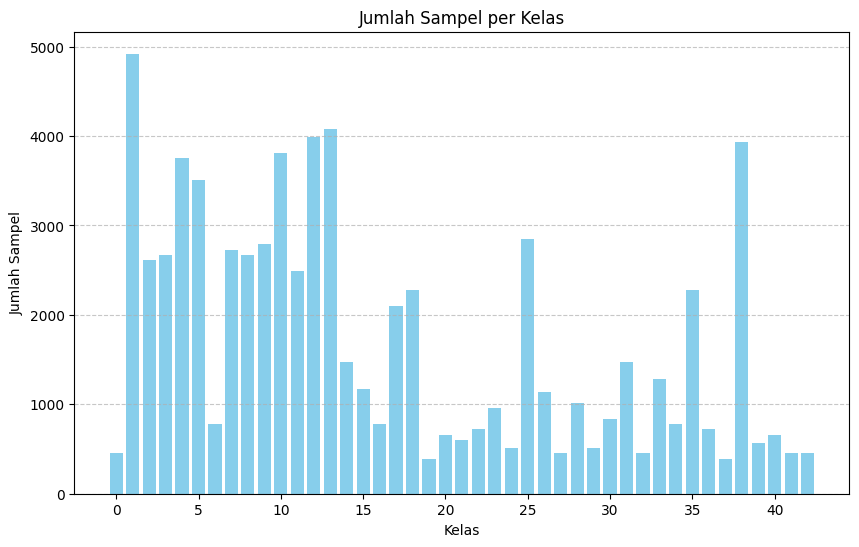

In [ ]:
# Hitung jumlah sampel per kelas
kelas, jumlah_sampel = np.unique(y, return_counts=True)

# Buat grafik
plt.figure(figsize=(10, 6))
plt.bar(kelas, jumlah_sampel, color='skyblue')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Sampel')
plt.title('Jumlah Sampel per Kelas')
plt.xticks(np.arange(0, len(kelas), 5))  # Mengatur label sumbu x agar lebih mudah dibaca
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Menambahkan grid pada sumbu y

# Tampilkan grafik
plt.show()

**Penanganan Dataset yang tidak seimbang**

Pengecekan keseimbangan dataset

In [ ]:
unique_labels, counts = np.unique(y, return_counts=True)
print("Label unik", unique_labels)
print("Jumlah:", counts)

Label unik [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]
Jumlah: [ 451 4920 2610 2670 3750 3510  780 2730 2670 2790 3810 2490 3990 4080
 1470 1170  780 2100 2280  390  660  600  720  960  510 2850 1140  450
 1020  510  840 1470  450 1288  780 2280  720  390 3930  570  660  450
  450]


Jadi berdasarkan hasil di atas, kumpulan datanya sangat tidak seimbang dan perlu diseimbangkan.

Penerapan OverSampling untuk menyeimbangkan dataset

In [ ]:
x = x.reshape(x.shape[0],3*32*32) # mengubah dimensi data gambar x menjadi bentuk matriks 2D
ros = RandomOverSampler() # Fungsinya untuk menyeimbangkan dataset dengan menggandakan sampel pada kelas minoritas sehingga jumlah sampel di setiap kelas menjadi seimbang.
x,y = ros.fit_resample(x,y) # melakukan oversampling pada data x dan label y
x = x.reshape(x.shape[0], 3, 32, 32) # mengembalikan data gambar ke bentuk semula, yaitu matriks 4D dengan dimensi (n_samples, 3, 32, 32) tiga saluran warna (RGB) dan ukuran 32x32 piksel.
print("Bentuk Data Seimbang - X:", x.shape, "Y:", y.shape)

Bentuk Data Seimbang - X: (211560, 3, 32, 32) Y: (211560,)


Pengecekan kembali keseimbangan dataset

In [ ]:
unique_labels, counts = np.unique(y, return_counts=True)
print("Label unik", unique_labels)
print("Jumlah:", counts)

Label unik [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]
Jumlah: [4920 4920 4920 4920 4920 4920 4920 4920 4920 4920 4920 4920 4920 4920
 4920 4920 4920 4920 4920 4920 4920 4920 4920 4920 4920 4920 4920 4920
 4920 4920 4920 4920 4920 4920 4920 4920 4920 4920 4920 4920 4920 4920
 4920]


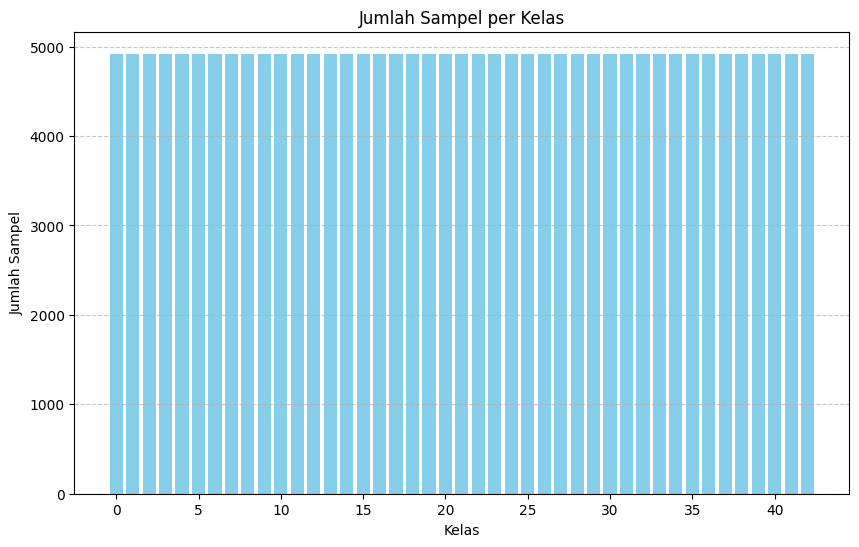

In [ ]:
# Hitung jumlah sampel per kelas
kelas, jumlah_sampel = np.unique(y, return_counts=True)

# Buat grafik
plt.figure(figsize=(10, 6))
plt.bar(kelas, jumlah_sampel, color='skyblue')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Sampel')
plt.title('Jumlah Sampel per Kelas')
plt.xticks(np.arange(0, len(kelas), 5))  # Mengatur label sumbu x agar lebih mudah dibaca
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Menambahkan grid pada sumbu y

# Tampilkan grafik
plt.show()

Sekarang datasetnya sudah seimbang. selanjutnya split dataset untuk training dan testing

**Split dataset untuk training dan testing**

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,stratify=y) #membagi data x dan label y menjadi data pelatihan dan data uji,dengan paramater 20% uji,80%pelatihan
del x,y # menghapus var x dan y
gc.collect() # membebaskan memori yang tidak digunakan lagi (x,y)
print("Bentuk Train Data - X:", xtrain.shape, "Y:", ytrain.shape)
print("Bentuk uji Data - X:", xtest.shape, "Y:", ytest.shape)

Bentuk Train Data - X: (169248, 3, 32, 32) Y: (169248,)
Bentuk uji Data - X: (42312, 3, 32, 32) Y: (42312,)


Mengkonversikan data train dan test dari array numpy ke tensor untuk perhitungan lebih lanjut

In [ ]:
# mengonversinya array NumPy menjadi tensor PyTorch
xtrain = torch.from_numpy(xtrain)
ytrain = torch.from_numpy(ytrain)
xtest = torch.from_numpy(xtest)
ytest = torch.from_numpy(ytest)

**Menginisialisasi Model Convolutonal Neural Network**

In [ ]:
model = nn.Sequential( #membuat urutan lapisan (layers) dalam model
                        # Layer pertama CNN
                        nn.Conv2d(3, 16,(3,3), 1, 1),  # lapisan konvolusi yang melakukan operasi konvolusi pada data gambar
                        nn.BatchNorm2d(16),            # lapisan normalisasi batch yang digunakan untuk meningkatkan konvergensi dan stabilitas pelatihan model.
                        nn.ReLU(True),                 # lapisan aktivasi ReLU yang mengaktifkan output dari lapisan sebelumnya.
                        nn.MaxPool2d((2,2)),           # lapisan pooling maksimum yang digunakan untuk mengurangi dimensi data gambar.

                        # Layer kedua CNN
                        nn.Conv2d(16, 32,(3,3), 1, 1),
                        nn.BatchNorm2d(32),
                        nn.ReLU(True),
                        nn.MaxPool2d((2,2)),

                        # Layer ketiga CNN
                        nn.Conv2d(32, 64,(3,3), 1, 1),
                        nn.BatchNorm2d(64),
                        nn.ReLU(True),
                        nn.MaxPool2d((2,2)),

                        nn.Flatten(), # mengubah data dari bentuk tensor 4D menjadi tensor 2D

                        nn.Linear(1024,256),   #transformasi linier pada data
                        nn.ReLU(True),
                        nn.Linear(256,43)
                    )

model = model.to(torch.device('cuda'),non_blocking=True) # mengirim model ke GPU (Cuda Memory) untuk mempercepat perhitungan
ts.summary(model,(3,32,32)) #mencetak ringkasan model

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             448
       BatchNorm2d-2           [-1, 16, 32, 32]              32
              ReLU-3           [-1, 16, 32, 32]               0
         MaxPool2d-4           [-1, 16, 16, 16]               0
            Conv2d-5           [-1, 32, 16, 16]           4,640
       BatchNorm2d-6           [-1, 32, 16, 16]              64
              ReLU-7           [-1, 32, 16, 16]               0
         MaxPool2d-8             [-1, 32, 8, 8]               0
            Conv2d-9             [-1, 64, 8, 8]          18,496
      BatchNorm2d-10             [-1, 64, 8, 8]             128
             ReLU-11             [-1, 64, 8, 8]               0
        MaxPool2d-12             [-1, 64, 4, 4]               0
          Flatten-13                 [-1, 1024]               0
           Linear-14                  [

Membuat Fungsi Evaluasi untuk mengevaluasi loss dan Accuracy model dan membuat Fungsi train Model untuk melatih model

In [ ]:
#mengevaluasi model cnn yang telah dilatih
def evaluate(model, data, target):
    device = torch.device('cpu') # menggunakan perangkat cpu untuk pemrosesan evaluasi
    model.to(device) # mengubah lokasi model ke cpu
    data = data.to(device, non_blocking=True, dtype=torch.float32) # mengubah lokasi dan tipe data dari data ke perangkat CPU dan mengubah Data torch.float32
    target = target.to(device, non_blocking=True, dtype=torch.long) # mengubah lokasi dan tipe data dari target ke perangkat CPU dan mengubah Data torch.long
    length = len(target) # menghitung panjang (jumlah sampel) dari data target
    yhat = model(data) # Memprediksi pada data yang telah dikonversi
    ypred = yhat.argmax(axis=1) # menghitung label prediksi dengan memilih indeks dengan probabilitas tertinggi dari setiap prediks
    loss = float(nn.functional.cross_entropy(yhat, target)) # Menghitung loss
    acc = float((ypred == target).sum() / length) # Menghitung akurasi
    print('Loss:', round(loss, 4), '- Accuracy:', round(acc, 4)) # Mencetak loss dan akurasi
    del data, target, yhat, ypred # Menghapus variabel sudah digunakan
    gc.collect()


Evaluasi Model pada test data sebelum training

In [ ]:
print('\nInitial Loss and Accuracy on Test Dataset :')
evaluate(model,xtest.float(),ytest)


Initial Loss and Accuracy on Test Dataset :
Loss: 3.8035 - Accuracy: 0.0215


Membuat Fungsi Train Model untuk melatih model

In [ ]:
def train_model(model=model,optimizer=torch.optim.Adam,epochs=5,batch_size=32,steps_per_epochs=200,l2_reg=0,max_lr=0.01,grad_clip=0.5):

    hist = [[],[],[],[]] # menyimpan catatan pelatihan, termasuk loss dan akurasi dari data pelatihan dan uji di setiap epoch.

    train_ds = [(x,y) for x,y in zip(xtrain,ytrain)] # mempersiapkan data pelatihan dalam bentuk list of tuples yang berisi pasangan input dan target.
    training_dl = torch.utils.data.DataLoader(train_ds,batch_size=batch_size) # melatih model dengan membagi data pelatihan menjadi batch-batch yang sesuai.
    train_dl = torch.utils.data.DataLoader(train_ds,batch_size=batch_size * steps_per_epochs) # melakukan evaluasi pada akhir setiap epoch

    del train_ds
    gc.collect() # Menghapus variabel yang tidak lagi digunakan dan membebaskan ruang

    optimizer = optimizer(model.parameters(),weight_decay=l2_reg) #mengoptimalkan model

    # menginisialisasi scheduler yang mengelola learning rate selama pelatihan menggunakan One Cycle Policy.
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer,max_lr,epochs=epochs, steps_per_epoch=int(steps_per_epochs * 1.01))

    device = torch.device('cpu')
    model = model.to(device)

    # Training
    for i in range(epochs):

        print('\nEpoch' , i+1 , ': [',end="")

        # Memuat Batch data pelatihan
        for j,(xb,yb) in enumerate(training_dl):

            xb = xb.to(device, non_blocking=True)
            yb = yb.to(device, non_blocking=True)

            # menghitung Losses dan gradients
            yhat = model(xb.float())
            loss = nn.functional.cross_entropy(yhat, yb)
            loss.backward()

            # proses pengamanan untuk mencegah ledakan gradien
            nn.utils.clip_grad_value_(model.parameters(),grad_clip)

            # mengupdate parameter model
            optimizer.step()
            optimizer.zero_grad()

            # mengupdate learning rate
            sched.step()

            del xb,yb,yhat
            gc.collect()
            # Menghapus variabel yang tidak lagi digunakan dan membebaskan ruang

            # cetak progres training epochs
            if j % int(steps_per_epochs / 20) == 0:
                print('.',end='')

            # break loop ketika semua langkah selesai.
            if steps_per_epochs == j :
                break


        # Epochs dan evaluation

        # Memuat batch data pelatihan dari loader data pelatihan
        for xtrainb,ytrainb in train_dl:
            break

        # Memindahkan data pelatihan ke perangkat CPU
        xtrain_cpu = xtrainb.to(device,non_blocking=True)
        ytrain_cpu = ytrainb.to(device,non_blocking=True)
        del xtrainb, ytrainb
        gc.collect()
        # Menghapus variabel yang tidak lagi digunakan dan membebaskan ruang

        # Menghitung loss dan akurasi pada data pelatihan
        yhat = model(xtrain_cpu.float())
        ypred = yhat.argmax(axis=1)
        train_loss = float(nn.functional.cross_entropy(yhat, ytrain_cpu))
        train_acc = float((ypred == ytrain_cpu).sum() / len(ytrain_cpu))

        del xtrain_cpu, ytrain_cpu, yhat, ypred
        torch.cuda.empty_cache()
        # Menghapus variabel yang tidak lagi digunakan dan membebaskan ruang

        # Memindahkan data uji ke CPU
        xtest_cpu = xtest.to(device,non_blocking=True)
        ytest_cpu = ytest.to(device,non_blocking=True)

        # Menghitung loss dan akurasi pada data pelatihan
        yhat = model(xtest_cpu.float())
        ypred = yhat.argmax(axis=1)
        val_loss = float(nn.functional.cross_entropy(yhat, ytest_cpu))
        val_acc = float((ypred == ytest_cpu).sum() / len(ytest_cpu))

        del xtest_cpu, ytest_cpu, yhat, ypred
        gc.collect()
        # Menghapus variabel yang tidak lagi digunakan dan membebaskan ruang

        # Mencetak hasil loss dan akurasi pelatihan dan uji pada akhir setiap epoch
        print('] - Train Loss :',round(train_loss,4),'- Train Accuracy :',round(train_acc,4),
              '- Val Loss :',round(val_loss,4), '- Val Accuracy :',round(val_acc,4))

        # Menyimpan data tersebut ke dalam daftar hist yang sebelumnya kosong
        hist[0].append(train_loss)
        hist[1].append(val_loss)
        hist[2].append(train_acc)
        hist[3].append(val_acc)

    # Menginisialisasi semua riwayat evaluasi setiap epoch ke dalam bentuk kamus
    history = {'Train Loss':hist[0],'Val Loss':hist[1],'Train Accuracy':hist[2], 'Val Accuracy':hist[3]}

    # Mengembalikan riwayat sebagai objek data frame pandas
    return pd.DataFrame(history)

Model pelatihan

In [ ]:
ytrain = ytrain.long()
ytest = ytest.long()
history = train_model(model,optimizer=torch.optim.Adam,epochs=25,steps_per_epochs=200,l2_reg=0,max_lr=0.015,grad_clip=0.5)



Epoch 1 : [.....................] - Train Loss : 1.3155 - Train Accuracy : 0.6367 - Val Loss : 1.407 - Val Accuracy : 0.6087

Epoch 2 : [.....................] - Train Loss : 0.4444 - Train Accuracy : 0.8694 - Val Loss : 0.5524 - Val Accuracy : 0.8347

Epoch 3 : [.....................] - Train Loss : 0.3187 - Train Accuracy : 0.9017 - Val Loss : 0.4345 - Val Accuracy : 0.8676

Epoch 4 : [.....................] - Train Loss : 0.2353 - Train Accuracy : 0.9261 - Val Loss : 0.3358 - Val Accuracy : 0.8993

Epoch 5 : [.....................] - Train Loss : 0.2269 - Train Accuracy : 0.9339 - Val Loss : 0.3647 - Val Accuracy : 0.8995

Epoch 6 : [.....................] - Train Loss : 0.1792 - Train Accuracy : 0.9458 - Val Loss : 0.2881 - Val Accuracy : 0.9157

Epoch 7 : [.....................] - Train Loss : 0.1587 - Train Accuracy : 0.9534 - Val Loss : 0.2997 - Val Accuracy : 0.9185

Epoch 8 : [.....................] - Train Loss : 0.1738 - Train Accuracy : 0.9489 - Val Loss : 0.3125 - Val Acc

Model History

In [ ]:
history

,Train Loss,Val Loss,Train Accuracy,Val Accuracy
0,1.315482,1.407003,0.636719,0.608716
1,0.444426,0.552367,0.869375,0.834704
2,0.318671,0.434519,0.901719,0.867603
3,0.235318,0.335782,0.926094,0.899343
4,0.226935,0.364717,0.933906,0.899532
5,0.179212,0.288089,0.945781,0.915674
6,0.158659,0.299660,0.953438,0.918510
7,0.173792,0.312483,0.948906,0.915060
8,0.091645,0.278413,0.976875,0.936826
9,0.081372,0.229485,0.973750,0.938835


Visualisasi Training History

In [ ]:
# Tampilkan grafik Loss
fig = px.line(history.iloc[:,:2], title='Loss Per Epochs', labels={'value':'Loss','index':'Epochs'})
fig.update_layout(title={'font_family':'Georgia','font_size':23,'x':0.5})

# Menyimpan gambar ke file HTML
pyo.plot(fig, filename='loss_plot.html')

# Tampilkan grafik Accuracy
fig = px.line(history.iloc[:,2:], title='Accuracy Per Epochs', labels={'value':'Accuracy','index':'Epochs'})
fig.update_layout(title={'font_family':'Georgia','font_size':23,'x':0.5})

# Menyimpan gambar ke file HTML
pyo.plot(fig, filename='accuracy_plot.html')


'accuracy_plot.html'

Laporan Klasifikasi Model pada Test Data

In [ ]:
# Pindah ke CPU
xtest =  xtest.to(torch.device('cpu'),non_blocking=True)
# Menghasilkan prediksi
ypred = model(xtest.float()).argmax(axis=1)
# memindahkan lagi xtest dan ypred ke CPU
xtest = xtest.to(torch.device('cpu'),non_blocking=True)
ypred = ypred.to(torch.device('cpu'),non_blocking=True)
# Menghitung metrik klasifikasi dan mencetak hasil
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       984
           1       0.97      0.93      0.95       984
           2       0.94      0.94      0.94       984
           3       0.95      0.98      0.96       984
           4       0.96      0.97      0.97       984
           5       0.93      0.93      0.93       984
           6       0.99      1.00      0.99       984
           7       0.95      0.95      0.95       984
           8       0.96      0.97      0.97       984
           9       0.99      0.98      0.99       984
          10       0.99      0.98      0.98       984
          11       0.99      0.95      0.97       984
          12       0.97      0.97      0.97       984
          13       0.99      0.97      0.98       984
          14       0.99      1.00      0.99       984
          15       0.98      1.00      0.99       984
          16       1.00      1.00      1.00       984
          17       1.00    

Create the Prediction Function

In [ ]:
def prediction(img):
    if type(img) == str:
      img = tv.transforms.ToTensor()(PIL.Image.open(img))
      img = cv2.resize(img.permute(1,2,0).numpy(),(32,32))
      img = torch.from_numpy(img).permute(2,0,1)
      img_tensor = img.unsqueeze(0).to(torch.device('cpu'))

      pred = int(model(img_tensor).argmax(axis=1)[0])
      pred_str = labels_df[labels_df['ClassId'] == pred]['Name'][pred]
      plt.figure(figsize=(5,5))
      plt.imshow(cv2.resize(img.permute(1,2,0).numpy(),(1000,1000)))
      plt.axis('off')

      print('\nTerdeteksi sebagai rambu :',pred_str,'\n')

Penerapan Fungsi Prediksi di atas


Terdeteksi sebagai rambu : Hanya lurus 



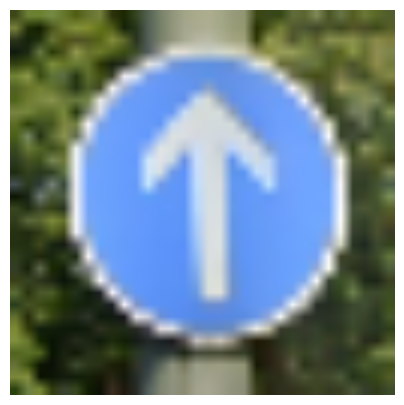

In [ ]:
prediction('C:\\Users\\Riston\\Desktop\\SKRIPSI 2023\\Data Prediksi\\Prediksi1.jpg')


Terdeteksi sebagai rambu : Stop 



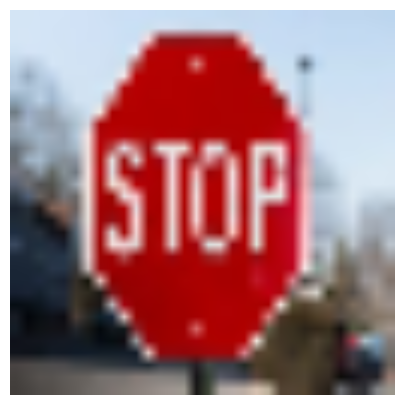

In [ ]:
prediction('C:\\Users\\Riston\\Desktop\\SKRIPSI 2023\\Data Prediksi\\Prediksi4.jpg')


Terdeteksi sebagai rambu : Stop 



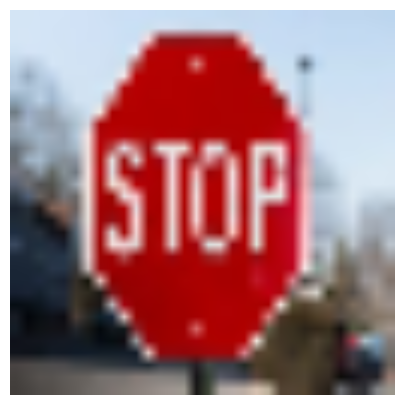

In [ ]:
prediction('C:\\Users\\Riston\\Desktop\\SKRIPSI 2023\\Data Prediksi\\Prediksi4.jpg')


Terdeteksi sebagai rambu : Batas kecepatan 120km/j 



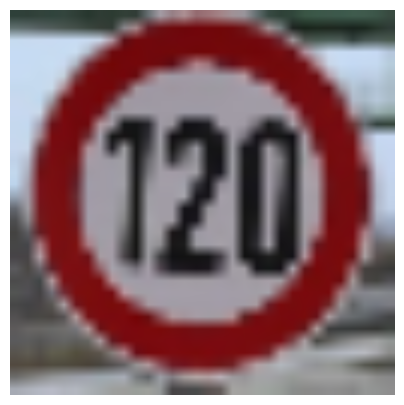

In [ ]:
prediction('C:\\Users\\Riston\\Desktop\\SKRIPSI 2023\\Data Prediksi\\prediksi97.jpg')

menyimpan model

In [ ]:
torch.save(model,'traffic_sign_recognition.pt')